In [84]:
# We need to read our data from the excel sheets we acquired from the LCRA
# Import Pandas to do so
import pandas as pd
data = pd.read_csv('WallerCreekat23rdStreet_rain.csv')
data.head() # Quick check to see the top of our data

,Date - Time,Count,Rain,Stage,Flow
0,10/14/17 17:45,12.36,0.0,1.01,1
1,10/14/17 17:30,12.36,0.0,1.01,1
2,10/14/17 17:15,12.36,0.0,1.04,1
3,10/14/17 17:01,12.36,0.0,1.00,1
4,10/14/17 16:45,12.36,0.0,1.01,1


In [85]:
# Visually represent the data in order to see any patterns or correlations
import seaborn as sns

# Allow plots to appear within the notebook
%matplotlib inline

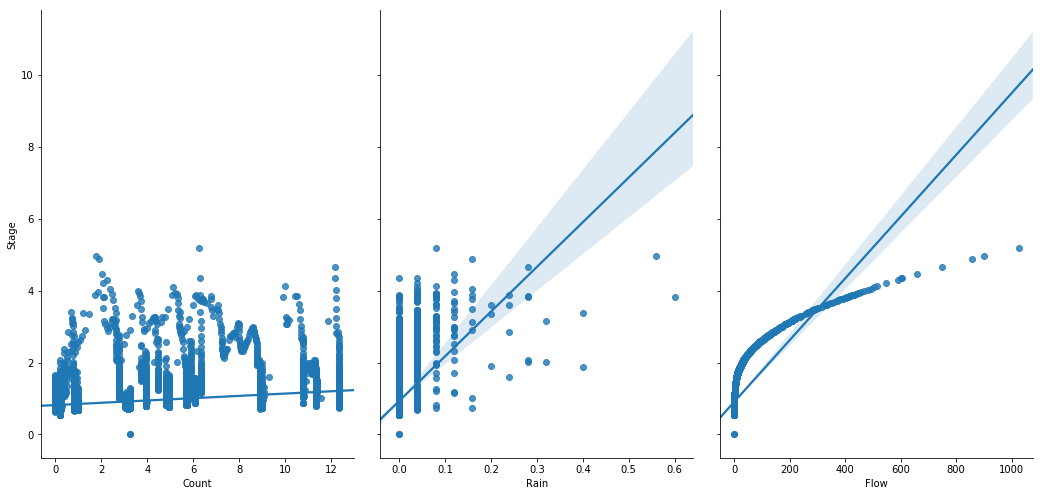

In [86]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars = ['Count', 'Rain', 'Flow'], y_vars = 'Stage', size = 7, aspect = 0.7, kind='reg')

In [87]:
# Visually, each variable/feature possesses little correlation (except Flow) with the stage
# Thus, we will need to use a model to see which variables are useful in our prediction algorithm
# Store our featuresin X
X = data[['Count', 'Rain', 'Flow']]
X.head() # Check our data to see if stored correctly

,Count,Rain,Flow
0,12.36,0.0,1
1,12.36,0.0,1
2,12.36,0.0,1
3,12.36,0.0,1
4,12.36,0.0,1


In [88]:
# Store results in y
y = data.Stage # This command is only possible if the y variable you want is a single word
y.head() # Check again

0    1.01
1    1.01
2    1.04
3    1.00
4    1.01
Name: Stage, dtype: float64

In [89]:
# We shall split X and y into training and testing sets for proper model evaluation
# This is known as train-test split which increases our testing accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# test_size = 0.4 specifies how much of your data should be used as test data. We will use the default of 0.25
# Since we do not have a lot to work with

In [90]:
# We will be using a Linear Regression Model as our machine learning algorithm
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

# Time to train our algorithm
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# Interpreting Model Coefficients
print linReg.intercept_
print linReg.coef_ # The weights of each feature/variable has towards our testing accuracy

0.798275327858
[ 0.02787154  1.01069826  0.00782262]


In [92]:
# Combine the feature names with their weights/coefficients
zip(['Count', 'Rain', 'Flow'], linReg.coef_)

[('Count', 0.027871541883583165),
 ('Rain', 1.0106982597760252),
 ('Flow', 0.0078226197371453025)]

In [93]:
# Time to make a prediction with our testing data
y_pred = linReg.predict(X_test)

In [94]:
# Let's get the RSME of our data. This way we can see how big of an error we have.
# We can do this because we know what the stage should be because we reserved testing data
import numpy as np
from sklearn import metrics
print np.sqrt((metrics.mean_squared_error(y_test, y_pred)))

0.190596668902


In [95]:
# The lower the RSME the better. We see that we have an error of 0.190596668902
# That is to say that the predicted result is off by an average of 0.190596668902

In [96]:
# Let's make a prediction of our own and see if our program gets close to the actual result
linReg.predict([[12.36, 0.0, 1]]) # You need to make a list inside a list since the predict method expects a 2D array

array([ 1.15059021])

In [97]:
# The actual stage for the variables we entered is 1.01 feet
# We were off by .14059021 feet which is not bad at all
# The goal from here is feeding the algorithm more data and implementing something known as K-fold cross-validation
# That is an implementation that increases testing accuracy and allows the algorithm to make better predictions